## HW02 Code

### Name: Kenny Yau

You will complete the following notebook, as described in the PDF for Homework 02 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.  (This can be generated by printing the notebook as PDF, or using the **File -> Download as** menu.  If you have trouble with the latter, a nice approach is to download in Markdown format, and then use a Markdown reader to print to PDF, which tends to produce nicer results than does printing from a browser.)

In [1]:
# import libraries as needed
from pprint import pprint    # for printing MSE arrays nicely

import numpy as np
import pandas as pd
import math

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8') # pretty matplotlib plots

### Plotting function

**Do not modify the following**: it takes in a list of polynomial (integer) values, along with associated lists consisting of the predictions made for the associated model, and the resulting error, and plots the results in a grid.

In [2]:
def plot_predictions(polynomials=list(), prediction_list=list(), error_list=list()):
    '''Plot predicted results for a number of polynomial regression models
    
    Args
    ----
    polynomials : list of positive integer values
        Each value is the degree of a polynomial regression model.
    prediction_list: list of arrays ((# polynomial models) x (# input data))
        Each array contains the predicted y-values for input data.
    error_list: list of error values ((# polynomial models) x 1)
        Each value is the mean squared error (MSE) of the model with 
        the associated polynomial degree.
    
        Note: it is expected that all lists are of the same length, and 
            that this length be some perfect square (for grid-plotting).
    '''
    length = len(prediction_list)
    grid_size = int(math.sqrt(length))
    if not (length == len(polynomials) and length == len(error_list)):
        raise ValueError("Input lists must be of same length")
    if not length == (grid_size * grid_size):
        raise ValueError("Need a square number of list items (%d given)" % (length))
    
    fig, axs = plt.subplots(grid_size, grid_size, figsize =(14,14), sharey=True)
    for subplot_id, prediction in enumerate(prediction_list):
        # order data for display
        data_frame = pd.DataFrame(data=[x[:, 0], prediction]).T
        data_frame = data_frame.sort_values(by=0)
        x_sorted = data_frame.iloc[:, :-1].values
        prediction_sorted = data_frame.iloc[:, 1].values

        ax = axs.flat[subplot_id]
        ax.set_title('degree = %d; MSE = %.3f' % (polynomials[subplot_id], error_list[subplot_id]))
        ax.plot(x, y, 'r.')
        ax.plot(x_sorted, prediction_sorted, color='blue')
        
    plt.show()

### Load the dataset

In [3]:
data = pd.read_csv('data.csv')
data

,x_i,y_i
0,1.590909,2.846988
1,1.803030,2.959811
2,4.984848,13.041394
3,1.696970,3.971889
4,1.272727,2.454520
...,...,...
95,5.090909,11.537465
96,10.500000,10.381492
97,1.484848,2.683212
98,0.636364,1.437600


In [4]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

### 1. Test a range of polynomial functions fit to the data

Fit models to data of polynomial degree $d \in \{1, 2, 3, 4, 5, 6, 10, 11, 12\}$.  For each such model, we will record its predictions on the input data, along with the mean squared error (MSE) that it makes.  These results are then plotted for comparison.

#### 1.1 Create function to generate models, make predictions, measure error.

In [5]:
def test_polynomials(polynomials=list(), xdata=np.zeros((0,0)), ydata=np.zeros((0,0))):
    '''Generates a series of polynomial regression models on input data.
       Each model is fit to the data, then used to predict values of that
       input data.  Predictions and mean squared error are collected and
       returned as two lists.
    
    Args
    ----
    polynomials : list of positive integer values
        Each value is the degree of a polynomial regression model, to be built.
    
    Returns
    -------
    prediction_list: list of arrays ((# polynomial models) x (# input data))
        Each array contains the predicted y-values for input data.
    error_list: list of error values ((# polynomial models) x 1)
        Each value is the mean squared error (MSE) of the model with 
        the associated polynomial degree.
    '''
    prediction_list = list()
    error_list = list()
    coeff_list = list()

    # TODO: fill in this function to generate the required set of models,
    #       returning the predictions and the errors for each.
    for degree in polynomials:
        
        # transform data
        # NOTE: PF.fit() doesn't fit a model to data
        #       it's just a step required by sklearn
        #       before i can use PF.transform()
        model = PolynomialFeatures(degree=degree)
        model.fit(xdata)
        transformed = model.transform(xdata)
        print(transformed.shape)
        
        # fit a model to the transformed data
        reg = linear_model.LinearRegression()
        reg.fit(transformed, ydata)
        
        # compute estimated predictions
        # predictions = transformed @ reg.coef_ + reg.intercept_
        predictions = reg.predict(transformed)
    
        
        # compute MSE
        residuals = ydata - predictions
        sq_residuals = np.square(residuals)
        error = np.mean(sq_residuals)

        # save return values of function
        prediction_list.append(predictions)
        error_list.append(error)
        coeff_list.append(reg.coef_)
        

    return prediction_list, error_list, coeff_list
    

(100, 2)
(100, 3)
(100, 4)
(100, 5)
(100, 6)
(100, 7)
(100, 11)
(100, 12)
(100, 13)


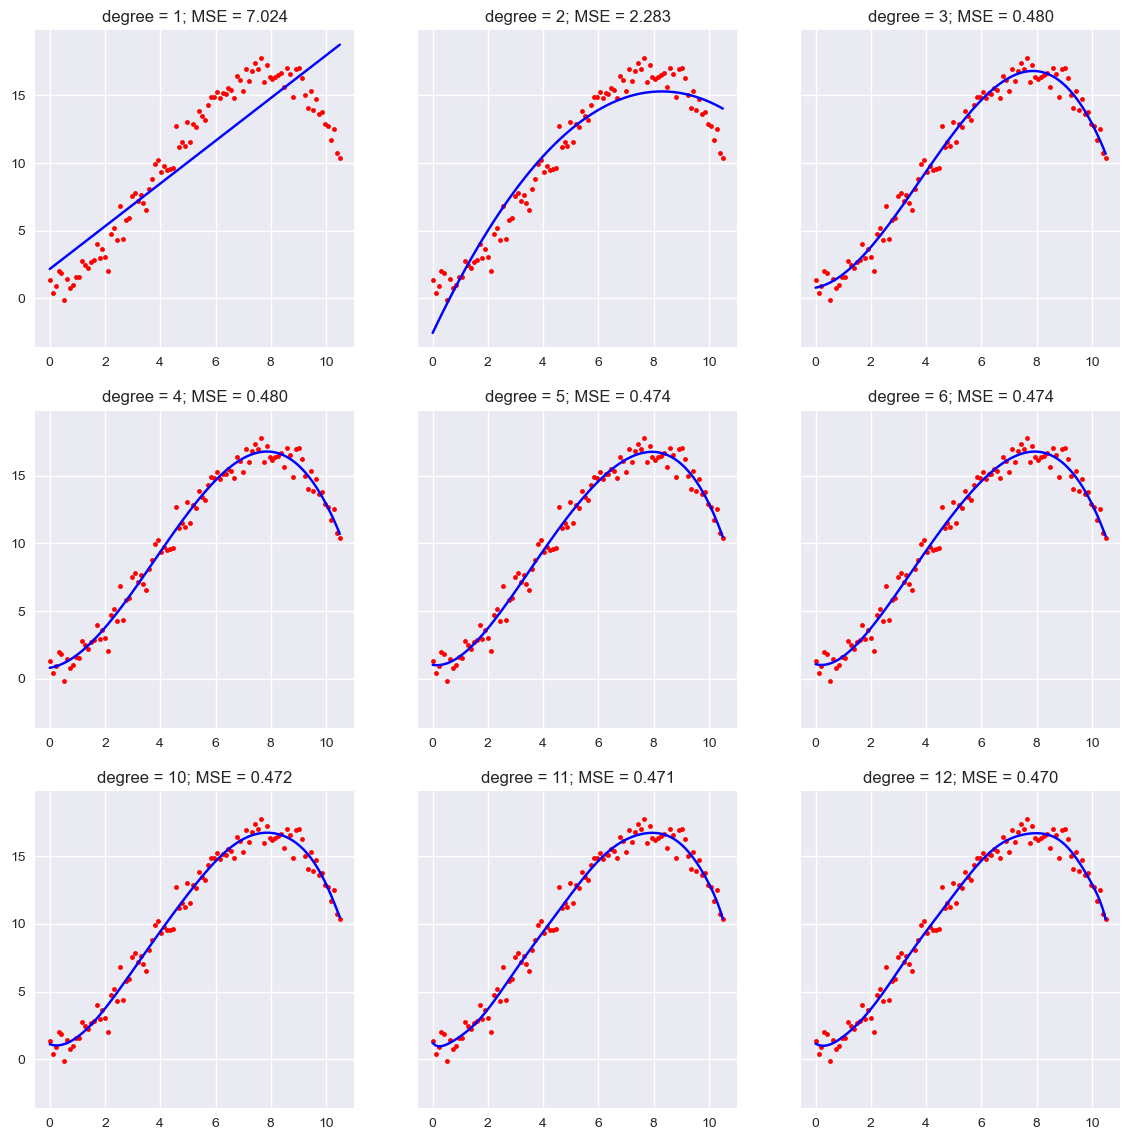

[0.        1.5803519]
[False  True]
num significant features: 1

[ 0.          4.30785203 -0.25976192]
[False  True False]
num significant features: 1

[ 0.          0.3855516   0.67882757 -0.05959298]
[False  True  True False]
num significant features: 2

[ 0.00000000e+00  3.33983535e-01  7.01188099e-01 -6.29166570e-02
  1.58270191e-04]
[False  True  True False False]
num significant features: 2

[ 0.00000000e+00 -3.40993947e-01  1.16024062e+00 -1.80366351e-01
  1.27730562e-02 -4.80563275e-04]
[False  True  True  True False False]
num significant features: 3

[ 0.00000000e+00 -5.44174592e-01  1.35958854e+00 -2.57238878e-01
  2.65734891e-02 -1.63940172e-03  3.67885220e-05]
[False  True  True  True False False False]
num significant features: 3

[ 0.00000000e+00 -8.30865420e-01  2.02407233e+00 -1.08158280e+00
  6.03387805e-01 -2.35804455e-01  5.69447777e-02 -8.38317796e-03
  7.32421712e-04 -3.48809234e-05  6.97165369e-07]
[False  True  True  True  True False False False False False Fals

In [6]:
# performing polynomial regression and plotting the results
degrees = [1, 2, 3, 4, 5, 6, 10, 11, 12]
predictions, errors, coeffs = test_polynomials(degrees, x, y)

plot_predictions(degrees, predictions, errors)

# investigating the importance of each feature
for coeff in coeffs:

    weight_allocation = np.abs(coeff)
    frac_allocation = weight_allocation / np.sum(weight_allocation)
    
    print(coeff)
    print(frac_allocation > 0.1)
    print(f'num significant features: {np.sum(frac_allocation > 0.1)}')
    print()


#### 1.2 Discuss the results seen in the plots above

**Discussion**:  The results show that a line is not a flexible enough model to fit the data. The best polynomial degree for fitting this set of data is n = 12 if we go by the degree with the smallest MSE. however, a degree of n=3 gets you nearly the same MSE as degrees 4-12. so choosing n=3 would be a good choice as well, since we use a quarter of the features to get the same goodness of fit!

Surprisingly, the visual fit doesn't change much. I attribute this to most of the allocation of coefficient weight going to just a handful of features. I did a crude feature significance analysis. I took the absolute value of the coefficient weights and summed them up to get a total weight budget. That let me compute the fractional contribution of each feature to the model. I counted every feature with a fractional allocation of more than 10% as significant. And this analysis showed that, even when the polynomial degree went up to 12, the number of significant features was only 4, indicating that the regression procedure didn't find the extra polynomial terms useful in describing the data.

### 2. $k$-fold cross-validation 

For each of the polynomial degrees, 5-fold cross-validation is performed.  Data is divided into 5 equal parts, and 5 separate models are trained and tested.  Results are averaged over the 5 runs and plotted (in a single plot), comparing training and test error for each of the polynomial degrees.  Error values are also shown in a tabular form.

#### Creating the $k$ folds

A function that generates the distinct, non-overlapping folds of the data.  (**Don't modify this.**)

In [7]:
# A simple function for generating different data-folds.
#
# DO NOT MODIFY THIS CODE.
def make_folds(x_data, y_data, num_folds=1):
    '''Splits data into num_folds separate folds for cross-validation.
       Each fold should consist of M consecutive items from the
       original data; each fold should be the same size (we will assume 
       that  the data divides evenly by num_folds).  Every data item should 
       appear in exactly one fold.
       
       Args
       ----
       x_data: input data.
       y_data: matching output data.
           (Expected that these are of the same length.)
       num_folds : some positive integer value
           Number of folds to divide data into.
           
        Returns
        -------
        x_folds : list of sub-sequences of original x_data 
            There will be num_folds such sequences; each will 
            consist of 1/num_folds of the original data, in
            the original order.
        y_folds : list of sub-sequences of original y_data
            There will be num_folds such sequences; each will 
            consist of 1/num_folds of the original data, in
            the original order.
       '''
    x_folds = list()
    y_folds = list()
    
    foldLength = (int)(len(x_data) / num_folds)
    start = 0
    for fold in range(num_folds):
        end = start + foldLength
        x_folds.append(x_data[start:end])
        y_folds.append(y_data[start:end])
        start = start + foldLength
        
    return x_folds, y_folds

In [8]:
# Print out start/end of each fold for sanity check.  Should see 5 folds,
# with the (x,y) pairs at the start/end of each.  (Can be manually verified 
# by looking at original input file.)
#
# DO NOT MODIFY THIS CODE.
k = 5
x_folds, y_folds = make_folds(x, y, k)
for i in range(k):
    print("Fold %d: (%.3f, %.3f) ... (%.3f, %.3f)"
         % (i, x_folds[i][0], y_folds[i][0], x_folds[i][-1], y_folds[i][-1]))

Fold 0: (1.591, 2.847) ... (10.394, 10.739)
Fold 1: (6.788, 16.408) ... (2.227, 4.722)
Fold 2: (9.545, 13.897) ... (3.924, 10.229)
Fold 3: (2.864, 5.929) ... (7.212, 16.030)
Fold 4: (7.530, 16.982) ... (0.848, 0.990)


C:\Users\poachie\AppData\Local\Temp\ipykernel_3580\1657889183.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Fold %d: (%.3f, %.3f) ... (%.3f, %.3f)"


#### 2.1 Perform cross-validation

For each of the polynomial degrees already considered, $k$-fold cross-validation is performed.  Average training error (MSE) and test error (MSE) are reported, both in the form of a plot and a tabular print of the values.

In [9]:
def _folds_to_train_test(folds, test_fold_idx):
    """
    selects one fold out of k folds to be the test data
    and uses the other k-1 folds for training data
    """
    k = len(folds)
    train_indices = [ii for ii in range(k) if ii != test_fold_idx]
    test_indices  = test_fold_idx
    train_folds = [folds[ii] for ii in train_indices]
    test_folds  = [folds[test_indices]]

    train_data = np.concatenate(train_folds, axis=0)
    test_data  = np.concatenate(test_folds, axis=0)

    return train_data, test_data

def polynomial_fit(degree, x_train_data, y_train_data, regtype='none', alpha=1):
    """
    Returns a model trained on labeled data using polynomial regression
    and returns the transformed features

    :param degree - degree of the polynomial for regression
    :param x_train_data - original feature data
    :param y_train_data - labels for the features
    :param regtype - type of regularization to apply to regression [none, ridge]

    :return reg - an sklearn.LinearRegression object trained on the provided labeled data
    :return transformed - the transformed feature data as specified by degree.
    """        
    # transform data
    # NOTE: PF.fit() doesn't fit a model to data
    #       it's just a step required by sklearn
    #       before i can use PF.transform()
    model = PolynomialFeatures(degree=degree)
    model.fit(x_train_data)
    transformed = model.transform(x_train_data)
    
    # choose sklearn model appropriate for the regularization type
    if regtype == 'ridge':
        reg = linear_model.Ridge(alpha=alpha)
    else:
        reg = linear_model.LinearRegression()
    
    # fit a model to the transformed data
    reg.fit(transformed, y_train_data)
        
    return reg, transformed


def kfold_cross_validation(x, y, degree, k, regtype='none', alpha=1):
    """
    :param x - predictive data
    :param y - output data
    :param degree - degree of the polynomial regression to perform
    :param k - number of folds into which to split the data

    :return avg_train_mse - average training MSE across all training/test data splits
    :return avg_test_mse  - average testing MSE across all training/test data splits
    """
    # split data into folds
    xfolds, yfolds = make_folds(x, y, k)

    train_mses = np.zeros(k)
    test_mses  = np.zeros(k)
    
    # iterate through all possible choices of train/test data splits
    for n in range(k):
        x_train_data, x_test_data = _folds_to_train_test(xfolds, n)
        y_train_data, y_test_data = _folds_to_train_test(yfolds, n)

        # fit a model to the training data
        reg, train_transformed = polynomial_fit(degree, x_train_data, y_train_data, regtype=regtype, alpha=alpha)

        # compute training MSE - method 1
        train_predictions = reg.predict(train_transformed)
        train_residuals = y_train_data - train_predictions
        train_mse = np.mean(train_residuals**2)

        # compute testing MSE
        test_transformed = PolynomialFeatures(degree=degree).fit(x_test_data).transform(x_test_data)
        test_predictions = reg.predict(test_transformed)
        test_residuals = y_test_data - test_predictions
        test_mse = np.mean(test_residuals**2)

        train_mses[n] = train_mse
        test_mses[n]  = test_mse

    avg_train_mse = np.mean(train_mses)
    avg_test_mse  = np.mean(test_mses)

    return avg_train_mse, avg_test_mse


def plot_mse_vs_degree(mses, degrees, label):

    plt.plot(degrees, mses, label=label)
    plt.title('average mse vs polynomial degree')
    plt.xlabel('degree')
    plt.ylabel('average MSE')


training MSEs:
[np.float64(6.9776406183845),
 np.float64(2.245920078402712),
 np.float64(0.4716205597489325),
 np.float64(0.4699092227255779),
 np.float64(0.46366318060546863),
 np.float64(0.46206862640077917),
 np.float64(0.45719905316479387),
 np.float64(0.4532938422919847),
 np.float64(0.453270432750815)]

testing MSEs:
[np.float64(7.441156512725608),
 np.float64(2.625608154791995),
 np.float64(0.5580828437253551),
 np.float64(0.5746231833029294),
 np.float64(0.5745796271740276),
 np.float64(0.5866062520061399),
 np.float64(0.6247478311175966),
 np.float64(0.6549529228281182),
 np.float64(0.638919583255776)]



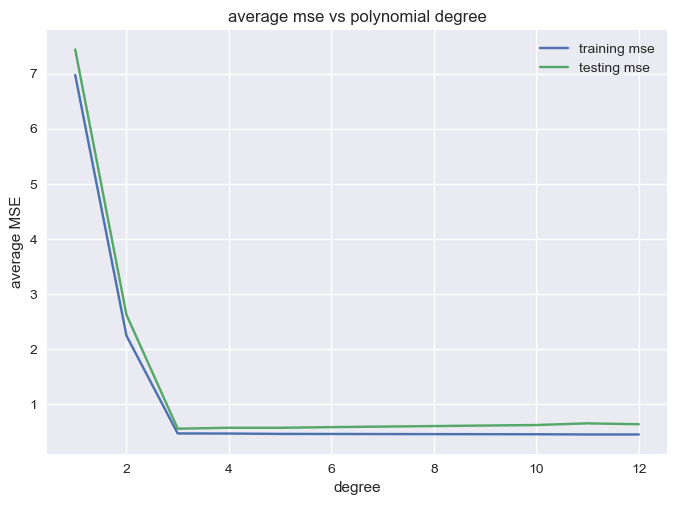

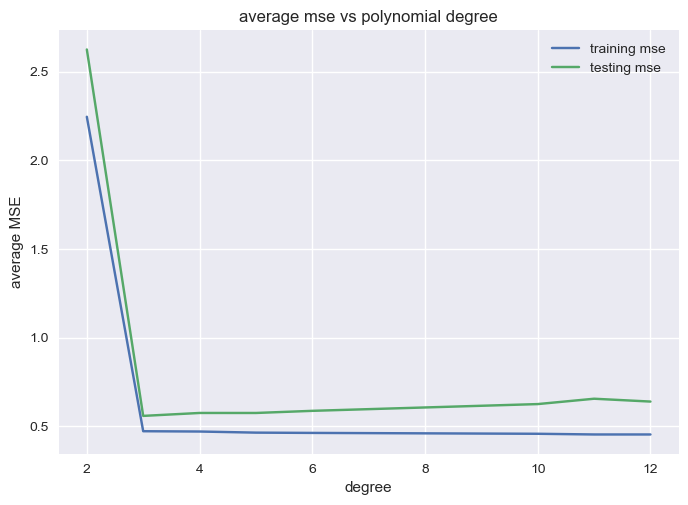

In [10]:
# TODO: Perform 5-fold cross-validation for each polynomial degree.  
#       Keep track of average training/test error for each degree; 
#       Plot results in a single table, properly labeled, and also
#       print out the results in some clear tabular format.


train_mses = list()
test_mses  = list()
for degree in degrees:
    avg_train_mse, avg_test_mse = kfold_cross_validation(x, y, degree, k)
    train_mses.append(avg_train_mse)
    test_mses.append(avg_test_mse)        


plt.figure()
plot_mse_vs_degree(train_mses, degrees, 'training mse')
plot_mse_vs_degree(test_mses, degrees, 'testing mse')
plt.legend()

# a second figure mirroring the first except we drop degree=1
# this is to help with inspecting the behavior at higher polynomial degree
plt.figure()
plot_mse_vs_degree(train_mses[1:], degrees[1:], 'training mse')
plot_mse_vs_degree(test_mses[1:], degrees[1:], 'testing mse')
plt.legend()

print('training MSEs:')
pprint(train_mses)
print('')

print('testing MSEs:')
pprint(test_mses)
print('')

plt.show()

#### 2.2 Discuss the results seen in the plots above

**Discussion:** The results show that, as we increase the polynomial degree, the training MSE monotonically decreases. However, that is not the case with testing MSE. There is a sweet spot for polynomial degree when it comes to testing MSE. This degree is 3. The monotonicity of the training MSE curve and the testing MSE having a global minimum is the exact behavior that the lecture videos and zoom lectures discussed.

### 3. Regularized (ridge) regression

Ridge regularization is a process whereby the loss function that is minimized combines the usual measure (error on the training data) with a penalty that is applied to the magnitude of individual coefficients.  This latter penalty discourages models that overly emphasize any single feature, and can often prevent over-fitting.

Here, a set of 50 different `sklearn.linear_model.Ridge` models are generated, each using a single polynomial degree (the one that was determined to be best for the data-set in earlier tests), and using a range of different regularization penalties, chosen from a logarithmic series: $s \in [0.01, 100]$.  5-fold cross-validation is again used to examine how robust these models are.

#### 3.1 Cross-validation for each regularization strength value

---tabulated alpha, training MSE, testing MSE---
         alpha  training mse  test_mses
0     0.010000      0.471621   0.558036
1     0.012068      0.471621   0.558026
2     0.014563      0.471621   0.558015
3     0.017575      0.471621   0.558001
4     0.021210      0.471621   0.557984
5     0.025595      0.471621   0.557963
6     0.030888      0.471621   0.557939
7     0.037276      0.471621   0.557909
8     0.044984      0.471621   0.557873
9     0.054287      0.471621   0.557831
10    0.065513      0.471621   0.557779
11    0.079060      0.471622   0.557717
12    0.095410      0.471622   0.557643
13    0.115140      0.471623   0.557554
14    0.138950      0.471623   0.557447
15    0.167683      0.471625   0.557320
16    0.202359      0.471627   0.557168
17    0.244205      0.471629   0.556987
18    0.294705      0.471633   0.556773
19    0.355648      0.471638   0.556520
20    0.429193      0.471646   0.556221
21    0.517947      0.471656   0.555871
22    0.625055      0.471671   

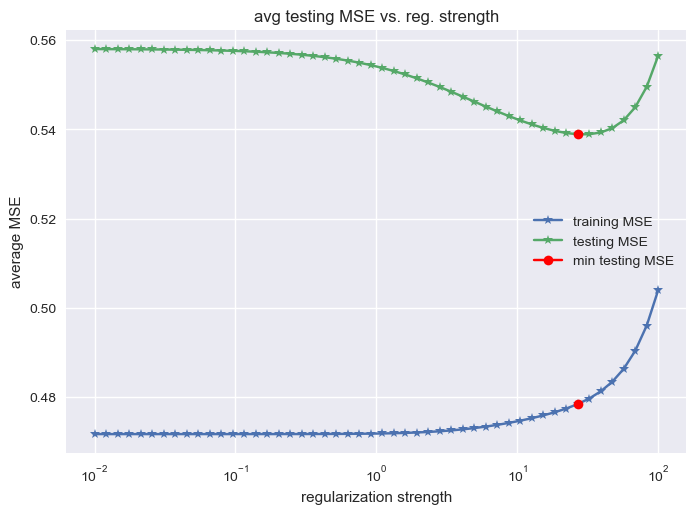

In [11]:
# TODO: Generate a sequence of 50 ridge models, varying the regularization strength
#       from 0.01 (10^-2) to 100 (10^2).  Each model is 5-fold cross-validated and
#       the resulting average training/test errors are tracked.  Errors are then
#       plotted (on a logarithmic scale) and printed in some legible tabular form.

def problem_3_1(x, y):
    """
    This problem investigates the purpose of regularization strength in 
    regression problems with regularization

    We run Ridge regression on the assignment-provided data using 50
    different values for `alpha`, the regularization strength
    """

    # obtained from inspection after running problem_2_1()
    best_degree = 3

    # choices for regularization strength, specified by assignment
    alphas = np.logspace(-2, 2, base=10, num=50)

    # number of folds to partition the data into
    k = 5

    # cross validation loop    
    num_alphas = len(alphas)
    train_mses = np.zeros((num_alphas))
    test_mses  = np.zeros((num_alphas))
    for ii, alpha in enumerate(alphas):
        avg_train_mse, avg_test_mse = kfold_cross_validation(x, y, best_degree, k, regtype="ridge", alpha=alpha)
        train_mses[ii] = avg_train_mse
        test_mses[ii]  = avg_test_mse


    # create dataframes for tabulating findings
    df_findings = pd.DataFrame({
        key: col 
        for key, col in zip(
            ['alpha', 'training mse', 'test_mses'], 
            [alphas, train_mses, test_mses]
        )
    })
        

    print('---tabulated alpha, training MSE, testing MSE---')
    print(df_findings)
    print('')


    # datapoint associated with minimum testing MSE
    min_idx = np.argmin(test_mses)
    min_dp = df_findings.iloc[min_idx]
    print('---datapoint associated with minimum testing MSE---')
    print(min_dp)


    plt.xscale('log')
    plt.plot(alphas, train_mses, label='training MSE', marker='*')
    plt.plot(alphas[min_idx], train_mses[min_idx], marker='o', color='r')
    plt.title('avg training MSE vs. reg. strength')
    plt.xlabel('regularization strength')
    plt.ylabel('average MSE')

    plt.plot(alphas, test_mses, label='testing MSE', marker='*')
    plt.plot(alphas[min_idx], test_mses[min_idx], label='min testing MSE', marker='o', color='r')
    plt.title('avg testing MSE vs. reg. strength')
    plt.xlabel('regularization strength')
    plt.ylabel('average MSE')
    plt.legend()

    return


problem_3_1(x, y)
plt.show()

#### 3.2 Discuss the results seen in the plots above

**Discussion**:  The results show that there is also a sweet spot that exists for regularization strength. For degree n=3, this is around alpha=30. The associated MSE is 0.5389. This actually beats the performance of the model that didn't have regularization and had the same polynomial degree. That model's testing MSE was 0.558. My guess for why regularization helped is because the original data strongly looks like degree 3 polynomial data. So regularization helped encourage the regression to pick a model more strongly aligned with the data.

Here, regularization is helpful with avoiding overfitting because the presence of regularization (and thus the encouragement to choose "fewer" features) actually helped the testing MSE. Interestingly, the training MSE actually went up monotonically as alpha increased. I am not sure what to make of this other than the fact that ordinary least squares was optimal in the squared error of the residuals. introducing regularization but keeping the polynomial degree the same would necessarily mean a deviation from that optimal solution, and so of course the training MSE would increase.